In [10]:

proportionSetter()


(6.25, -7.5, 1.125, 1.0125, 0.1125)

In [10]:

#these system attributes are for the silver line 
nstations = 28 #number of stations
tlength = 47636.58 #meters
sdensity = nstations/tlength #number of stations per meter of line
cspeed = 14.7523 #train cruising speed in meters per second
dtime = 30 #seconds
fsize = 10 #twice the number of trains operating in each direction- this I am still trying to find
abdensity = 5 #variable to be optimized
N = 1000 #number of passengers per unit time starting a trip in each station in units pax/s- this I am still trying to find



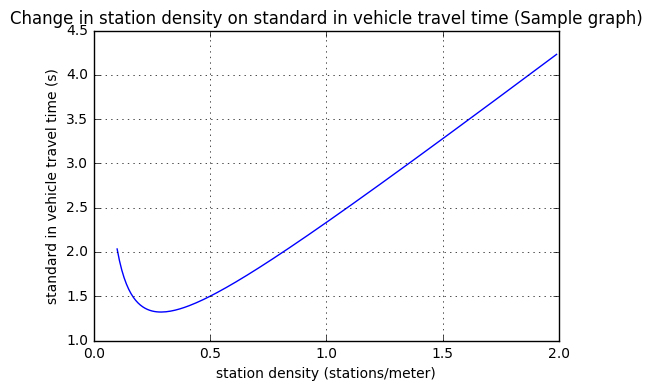

In [28]:
def standinvehicletravelTime(trackLength, stationDensity, cruisingSpeed,dwellTime):

   return ((trackLength+ (1/stationDensity))/(2*cruisingSpeed)) + (trackLength* dwellTime * (.5*stationDensity))

#in vehicle travel time for passengers while on the train for a standard stop procedure (all stop)

import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.1, 2.0, 0.01)
s = standinvehicletravelTime(tlength,t,cspeed,dtime)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='station density (stations/meter)', ylabel='standard in vehicle travel time (s)',
       title='Change in station density on standard in vehicle travel time (Sample graph)')
ax.grid()

fig.savefig("test.png")
plt.show()

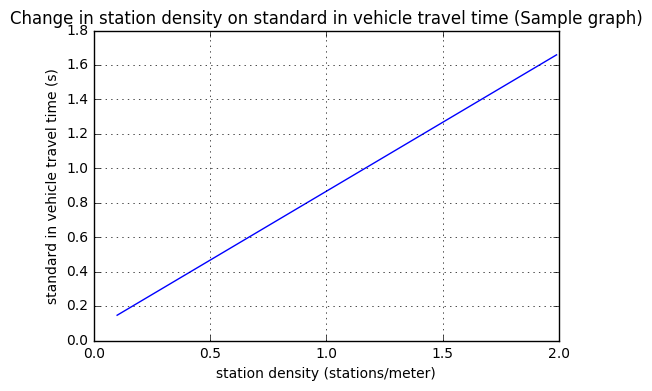

In [24]:
def standwaitingTime(trackLength, stationDensity, cruisingSpeed,dwellTime,fleetSize):

    cycleTime= (((2*trackLength)/(cruisingSpeed)) + 2*trackLength*stationDensity*dwellTime)
    return cycleTime/(2*fleetSize)
#waiting time for passengers on a standard stop procedure (all stop)

# Data for plotting
t = np.arange(0.1, 2.0, 0.01)
s = standwaitingTime(tlength,t,cspeed,dtime,fsize)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='station density (stations/meter)', ylabel='standard in vehicle travel time (s)',
       title='Change in station density on standard in vehicle travel time (Sample graph)')
ax.grid()

fig.savefig("test.png")
plt.show()

#this code for plotting the graph was sourced from http://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html

In [11]:
def proportionSetter():
    p1 = (abdensity**2)/(sdensity**2)
    p2 = (2*(sdensity-abdensity)*abdensity)/(sdensity**2)
    p3 = ((sdensity-abdensity)**2)/(2*sdensity**2)
    p4 = (1/sdensity**2) * (((sdensity-abdensity)**2)/2) * (((2*tlength*abdensity)-1)/(2*tlength*abdensity))
    p5 = (1/sdensity**2) * (((sdensity-abdensity)**2)/2) * (1/(2*tlength*abdensity))
    
    return p1,p2,p3,p4,p5


#proportions of each type of trip for a skip stop operation. 

proportionSetter()

(6.25, -7.5, 1.125, 1.0125, 0.1125)

In [12]:
def averagestopSetter():
    p1stops  = (tlength*(sdensity+abdensity))/(2*(2-(tlength*abdensity)**-1)) 
    p2stops = ((sdensity+ abdensity)*tlength)/4
    p3stops = (tlength)* ((sdensity+abdensity)/4)
    p4stops = ((tlength)**2 * abdensity * (sdensity+abdensity))/(2*((2*tlength*abdensity) -1))
    p5stops = (sdensity + 5*abdensity)/(4*abdensity)
    
    return p1stops,p2stops,p3stops,p4stops,p5stops
cycletime = ((2*tlength)/(cspeed)) + ((2*tlength)*((sdensity+abdensity)/2)*(dtime))

averagestopSetter()
#average number of stops for each type of trip. 

(1.9444444444444444, 1.75, 1.75, 1.9444444444444444, 1.35)

In [16]:
def waitingTime():
    w1time= cycletime/(2*fsize)
    w2time= 2*w1time
    w3time= 2*w1time
    w4time= 4*w1time
    w5time= 4*w1time
    return w1time,w2time,w3time,w4time,w5time
    
    #waiting time for each type of trip; the waiting times after the first one are defined in terms of w1time. 

waitingTime()
    
    

(2.8666666666666667,
 5.733333333333333,
 5.733333333333333,
 11.466666666666667,
 11.466666666666667)